# Obtenir la base de données





In [ ]:
import zipfile

# Décompressez le fichier (pizza_steak.zip)
ref_zip = zipfile.ZipFile("pizza_steak.zip", "r")
ref_zip.extractall()
ref_zip.close()

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("/content/pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/pizza_steak'.
There are 2 directories and 0 images in '/content/pizza_steak/test'.
There are 0 directories and 250 images in '/content/pizza_steak/test/pizza'.
There are 0 directories and 250 images in '/content/pizza_steak/test/steak'.
There are 2 directories and 0 images in '/content/pizza_steak/train'.
There are 0 directories and 750 images in '/content/pizza_steak/train/pizza'.
There are 0 directories and 750 images in '/content/pizza_steak/train/steak'.


In [ ]:
#Une autre façon de savoir combien d'images se trouvent dans un fichier
numero_steak_pour_train = len(os.listdir("/content/pizza_steak/train/steak"))
numero_steak_pour_train

750


Obtenez les noms de classe

In [ ]:
import pathlib
import numpy as np
## transformer notre parcours de formation en parcours Python
direction_de_donnees = pathlib.Path("/content/pizza_steak/train/")

# créé une liste de Nom_des_classes à partir des sous-répertoires
Noms_de_classes = np.array(sorted([item.name for item in direction_de_donnees.glob('*')]))
Noms_de_classes


array(['pizza', 'steak'], dtype='<U5')

In [ ]:
#répertorier les mêmes informations pour le répertoire de pizza dans le dossier de test
numero_pizza_pour_test = len(os.listdir("/content/pizza_steak/test/pizza"))
print("numero pizza pour test :",numero_pizza_pour_test)
Noms_de_classes = np.array(sorted([item.name for item in direction_de_donnees.glob('*')]))
print("les noms de classes sont :",Noms_de_classes)

numero pizza pour test : 250
les noms de classes sont : ['pizza' 'steak']


# Apprentissage d'un modèle de classification binaire (CNN)


## 1- Visualisation des données

In [ ]:
#Visualiser une image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def visualiser_image_aleatoirement(chemin_cible, classe_cible):
        ############# Inserer le code ###############
 # Configurer le répertoire cible (nous verrons les images à partir d'ici)
    repertoire_cible = pathlib.Path(chemin_cible)
 # Obtenir un chemin d'image aléatoire
    chemin_image_cible = random.choice(list(repertoire_cible.glob(f"{classe_cible}/*")))
 # Lire l'image à partir du chemin
    image = mpimg.imread(chemin_image_cible)
 # Lisez l'image et tracez-la à l'aide de matplotlib
    plt.axis("off");
    print(f"Forme de l’image: {image.shape}") # montrer la forme de l'image
    plt.imshow(image)
    plt.title(f"Image de {classe_cible}");
    return image


Forme de l’image: (339, 512, 3)
Forme de l’image: (511, 512, 3)


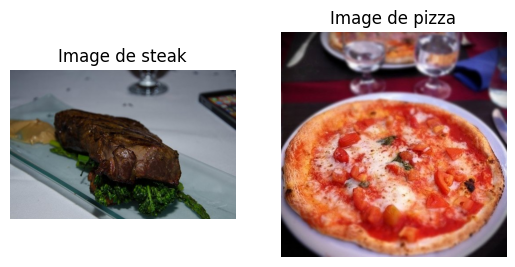

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = visualiser_image_aleatoirement (chemin_cible= "pizza_steak/train/", classe_cible= "steak")
plt.subplot(1, 2, 2)
pizza_img = visualiser_image_aleatoirement ("pizza_steak/train/", "pizza")

## 2- Prétraiter les données (les préparer pour un modèle)


In [ ]:
# Définir les Chemins d'accès aux répertoires de train et test
Chemin_train = pathlib.Path("pizza_steak/train/")
Chemin_test = pathlib.Path("pizza_steak/test/")


 transformer nos données en batches

In [ ]:
# Créer des générateurs de données de train et de test et redimensionner les données(pixels)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale=1/255.)
test_gen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Transformez-le en batches (compléter le code)
donnees_train = train_gen.flow_from_directory(directory= Chemin_train,
                                             target_size= (224,224)  ,
                                             class_mode= 'binary',
                                             batch_size= 32 )
donnees_test = test_gen.flow_from_directory(directory= Chemin_test ,
                                            target_size= (224,224) ,
                                            class_mode= 'binary' ,
                                            batch_size= 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Obtenir un échantillon du batch de données de train
images, labels = next(donnees_train) # obtenir le 'next' batchesd'images/labels
len(images), len(labels)

(32, 32)

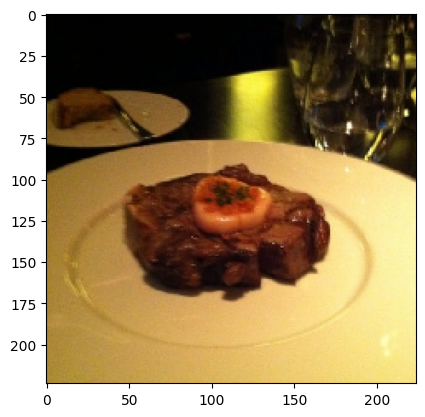

In [ ]:
plt.imshow(images[4])
plt.show()

In [ ]:
images[4]

array([[[0.85098046, 0.7294118 , 0.5137255 ],
        [0.854902  , 0.7137255 , 0.47058827],
        [0.7568628 , 0.4901961 , 0.34509805],
        ...,
        [0.9058824 , 0.6666667 , 0.        ],
        [0.9333334 , 0.46274513, 0.01960784],
        [0.8862746 , 0.4784314 , 0.00392157]],

       [[0.8745099 , 0.7372549 , 0.50980395],
        [0.8078432 , 0.6156863 , 0.38823533],
        [0.6509804 , 0.34509805, 0.19607845],
        ...,
        [0.90196085, 0.6117647 , 0.01960784],
        [0.95294124, 0.5686275 , 0.        ],
        [0.8980393 , 0.69411767, 0.1137255 ]],

       [[0.854902  , 0.6901961 , 0.46274513],
        [0.7294118 , 0.454902  , 0.2627451 ],
        [0.6156863 , 0.27058825, 0.1137255 ],
        ...,
        [0.95294124, 0.6509804 , 0.03921569],
        [0.9176471 , 0.57254905, 0.        ],
        [0.8980393 , 0.7019608 , 0.32941177]],

       ...,

       [[0.89019614, 0.8862746 , 0.8705883 ],
        [0.8941177 , 0.89019614, 0.8745099 ],
        [0.8941177 , 0

In [ ]:
# Obtenir les deux premières images
images[:2], images[0].shape
# Afficher le premier batch des labels
labels

array([0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1.],
      dtype=float32)

0 : pizza, 1: steak

## 3- Créer un modèle (commencer par une ligne de base)


Architecture du réseau
Le réseau que nous allons implémenter a un style proche de l’architecture TinyVGG, c’est une version réduite de VGG-16, un réseau neuronal convolutif qui est arrivé en 2014.   
Il sera composé des couches suivantes :  
— conv1 : 10 convolutions 3×3, suivie de ReLU  
— conv2 : 10 convolutions 3×3, suivie de ReLU  
— pool1 : max-pooling 2×2  
— conv3 : 10 convolutions 3×3, suivie de ReLU  
— conv4 : 10 convolutions 3×3, suivie de ReLU  
— pool2 : max-pooling 2×2  
— fc4 : fully-connected  
— fc5 : fully-connected, neurones binaire en sortie, suivie de sigmoide

Dans notre cas, prenons une version plus petite du modèle et construisons un réseau de
neurones convolutionnels à 3 couches.  
Essayer d’implémenter le modèle suivant :  
— conv1 : 10 convolutions 3×3, suivie de ReLU  
— conv2 : 10 convolutions 3×3, suivie de ReLU  
— conv3 : 10 convolutions 3×3, suivie de ReLU   
— fc4 : fully-connected  
— fc5 : fully-connected, neurones binaire en sortie, suivie de sigmoide

In [ ]:
# Rendre la création du modèle un peu plus facile
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,Activation
from tensorflow.keras import Sequential
# Créez le modèle
modele_1 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3*3,
           activation = "relu",
           padding = "same", # taille d image de sortie de conv egal a la taille d'entree
           input_shape = (224,224,3)), # couche de sortie(specifier la dimension des donnes d'entrees)
     Conv2D(10,3,activation="relu"),
     Conv2D(10,3,activation="relu"),
     Flatten(),
     # Dense(64,activation="relu"),
     Dense(1,activation="sigmoid")# couche de sortie (specifier la dimension de sortie: une seule)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modele_1.summary()  # afficher l'architecture du modele

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 10)        │           2,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 222, 222, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 484000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │         484,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 488,261 (1.86 MB)

 Trainable params: 488,261 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

(batch size, taille de img, profendeur)

In [ ]:
len(donnees_test), len(donnees_train)

(16, 47)

In [ ]:
# Compiler le modèle (compléter le code)
modele_1.compile(loss="binary_crossentropy",
                  optimizer=Adam() ,
                  metrics=["accuracy"])

## 4- Adapter le modèle

Ici deux nouveaux paramètres :  
* steps_per_epoch - c'est le nombre de batches (lots) qu'un modèle traversera par époque
(epochs=5), dans notre cas, nous voulons que notre modèle passe par tous les lots donc il
est égal à la longueur de donnees_train (1500 images par lots de 32 = 1500/32 = ~ 47
étapes)
* validation_steps - comme ci-dessus, sauf pour le paramètre donnees_valid (500
images de test par lots de 32 = 500/32 = ~16 étapes)

In [ ]:
modele_1.fit(donnees_train , epochs=5 ,  #epochs=5: on repete le processus d'entraineement 5 fois
             # steps_per_epoch = 47,
             validation_data= donnees_test,
             batch_size=32,
             #validation_steps= 16
             )

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 237s 5s/step - accuracy: 0.6368 - loss: 0.9943 - val_accuracy: 0.7500 - val_loss: 0.5109
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 264s 5s/step - accuracy: 0.7979 - loss: 0.4589 - val_accuracy: 0.8240 - val_loss: 0.3985
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 237s 5s/step - accuracy: 0.8677 - loss: 0.3430 - val_accuracy: 0.7840 - val_loss: 0.4756
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - accuracy: 0.9510 - loss: 0.1617 - val_accuracy: 0.7760 - val_loss: 0.5803
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 262s 5s/step - accuracy: 0.9917 - loss: 0.0570 - val_accuracy: 0.7420 - val_loss: 0.7829


## 5- Évaluer le modèle


<Axes: >

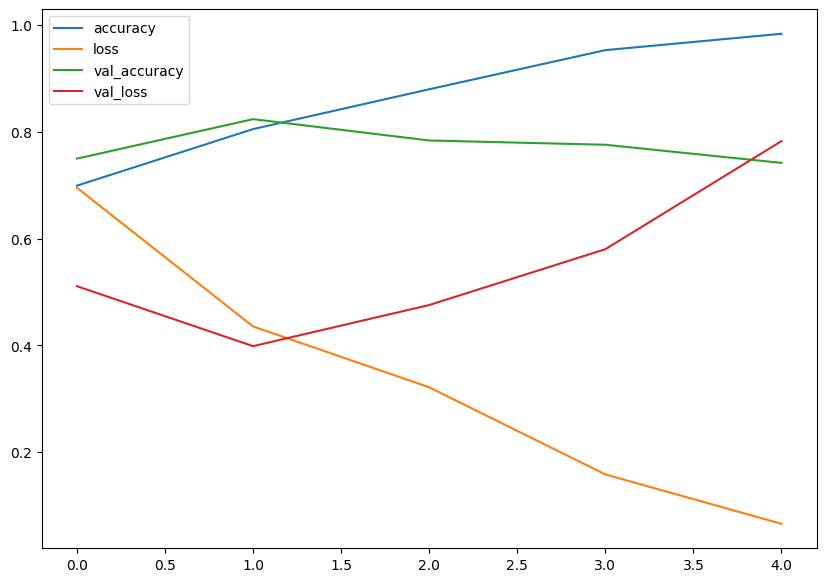

In [ ]:
historique_1 = modele_1.history
# Tracer les courbes d'entraînement
import pandas as pd
pd.DataFrame(historique_1.history).plot(figsize=(10, 7))

on remarque qu 'il y a probleme d'overfitting:a un certain temps loss diminue tandis que val_loss  augmente

In [ ]:
# Tracer les données de validation et de formation séparément
def Tracer_perte_curves(historique):
 """
 Renvoie des courbes de perte distinctes pour les métriques de
formation et de validation.
 """
 loss = historique.history['loss']
 val_loss = historique.history['val_loss']
 accuracy = historique.history['accuracy']
 val_accuracy = historique.history['val_accuracy']
 epochs = range(len(historique.history['loss']))
 # Tracer la function perte
 plt.plot(epochs, loss, label='training_loss')
 plt.plot(epochs, val_loss, label='val_loss')
 plt.title('Loss')
 plt.xlabel('Epochs')
 plt.legend()
 # Tracer la precision (accuracy)
 plt.figure()
 plt.plot(epochs, accuracy, label='training_accuracy')
 plt.plot(epochs, val_accuracy, label='val_accuracy')
 plt.title('Accuracy')
 plt.xlabel('Epochs')
 plt.legend();

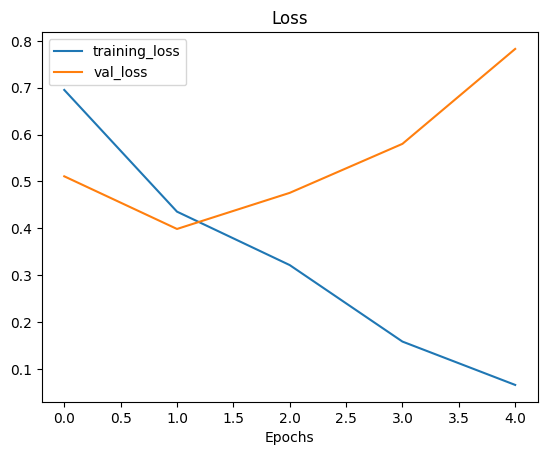

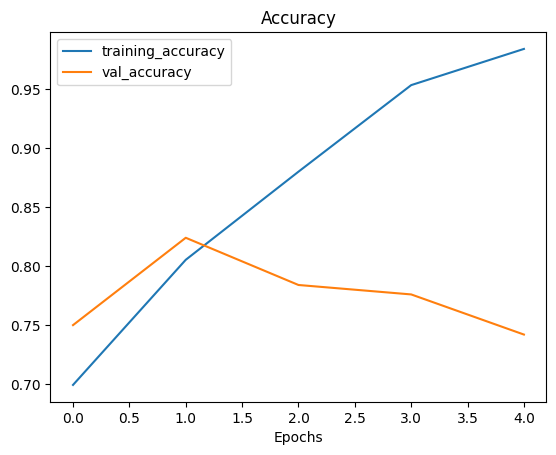

In [ ]:
# Consultez les courbes de perte de model_1
Tracer_perte_curves(historique_1)

In [ ]:
# Découvrez l'architecture de notre modèle
modele_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 10)        │           2,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 222, 222, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 484000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │         484,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,464,785 (5.59 MB)

 Trainable params: 488,261 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 976,524 (3.73 MB)

## 6- Ajuster les paramètres du modèle (Améliorations des résultats)


Afin d'ajuster un modèle d'apprentissage automatique, il faut passer par 3 étapes :
0. Créer une ligne de base.
1. Battez la ligne de base en sur-ajustant un modèle plus grand.
2. Réduire le sur-ajustement.
Jusqu'à présent, nous avons suivi les étapes 0 et 1.
Et il y a même quelques autres choses que nous pourrions essayer de sur-ajuster davantage notre modèle :
*  Augmentez le nombre de couches convolutionnelles.
*  Augmentez le nombre de filtres convolutionnels.
*  Ajoutez une autre couche dense à la sortie de notre couche aplatie (flattened layer).    

Mais ce que nous allons faire à la place, c'est nous concentrer sur l'alignement des courbes
d'entraînement de notre modèle, en d'autres termes, nous passerons à l'étape 2.

In [ ]:
# Créez le modèle 2
modele_2 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size= 2*2,
              padding="same",
              strides= 2,
              data_format="channels_last"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size= 2*2,
              padding="same",
              strides= 2,
              data_format="channels_last"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size= 2*2,
              padding="same",
              strides= 2,
              data_format="channels_last"),
    Flatten(),
    Dense(1,activation="sigmoid")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


max pooling permet de reduire la taille de l'image et ne garder que les caracteres importants

Compiler et adapter le modèle


In [ ]:
# Modèle de compilation (modele_2 qui identique à modele_1)
modele_2.compile(loss="binary_crossentropy",
                  optimizer=Adam() ,
                  metrics=["accuracy"])

In [ ]:
modele_2.summary()  # afficher l'architecture du modele

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 55, 55, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 53, 53, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 27, 27, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7290)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           7,291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,391 (36.68 KB)

 Trainable params: 9,391 (36.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
modele_2.fit(donnees_train , epochs=5 ,  #epochs=5: on repete le processus d'entraineement 5 fois
             # steps_per_epoch = 47,
             validation_data= donnees_test,
             batch_size=32,
             #validation_steps= 16
             )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.6673 - loss: 0.6240 - val_accuracy: 0.8240 - val_loss: 0.3889
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8134 - loss: 0.4258 - val_accuracy: 0.8140 - val_loss: 0.3989
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.8342 - loss: 0.3955 - val_accuracy: 0.8360 - val_loss: 0.3593
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8260 - loss: 0.4101 - val_accuracy: 0.8740 - val_loss: 0.2996
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.8401 - loss: 0.3624 - val_accuracy: 0.8580 - val_loss: 0.3139


<Axes: >

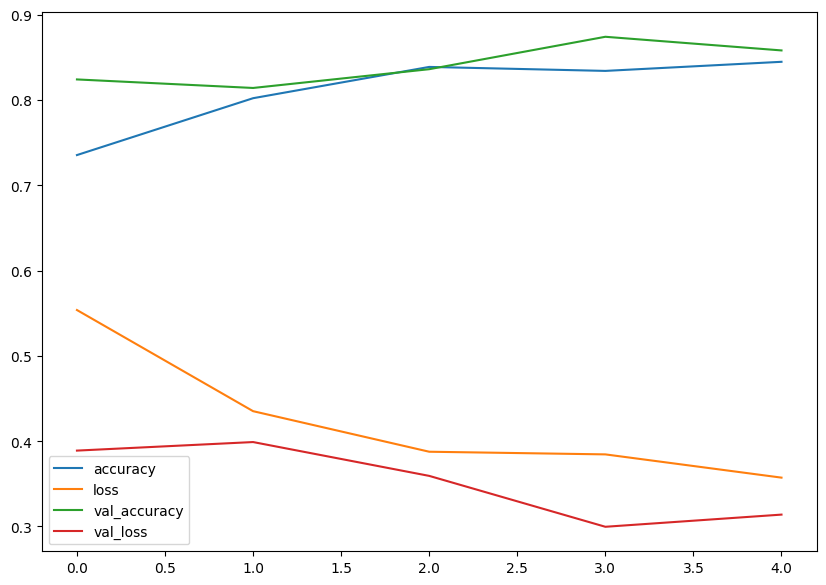

In [ ]:
historique_2 = modele_2.history
# Tracer les courbes d'entraînement
import pandas as pd
pd.DataFrame(historique_2.history).plot(figsize=(10, 7))

In [ ]:
# Tracer les données de validation et de formation séparément
def Tracer_perte_curves(historique):
 """
 Renvoie des courbes de perte distinctes pour les métriques de
formation et de validation.
 """
 loss = historique.history['loss']
 val_loss = historique.history['val_loss']
 accuracy = historique.history['accuracy']
 val_accuracy = historique.history['val_accuracy']
 epochs = range(len(historique.history['loss']))
 # Tracer la function perte
 plt.plot(epochs, loss, label='training_loss')
 plt.plot(epochs, val_loss, label='val_loss')
 plt.title('Loss')
 plt.xlabel('Epochs')
 plt.legend()
 # Tracer la precision (accuracy)
 plt.figure()
 plt.plot(epochs, accuracy, label='training_accuracy')
 plt.plot(epochs, val_accuracy, label='val_accuracy')
 plt.title('Accuracy')
 plt.xlabel('Epochs')
 plt.legend();

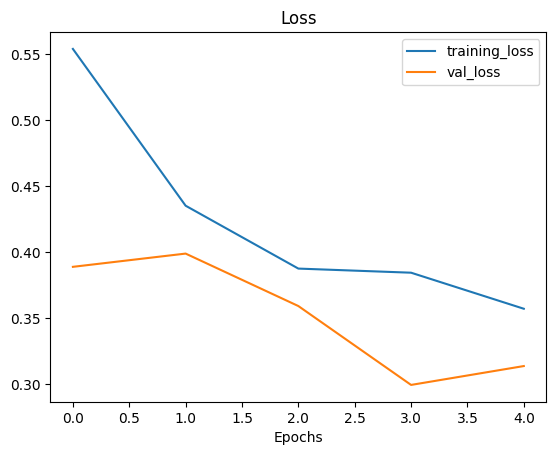

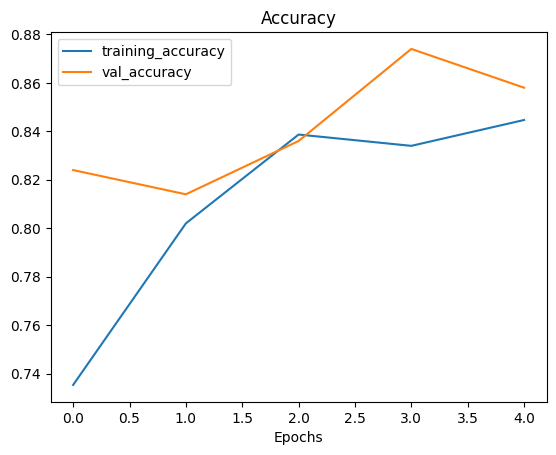

In [ ]:
Tracer_perte_curves(historique_2)

## Augmentation du nombre d’exemples d’apprentissage par data augmentation


Créer une instance de formation ImageDataGenerator avec augmentation des données en
utilisant :
- rotation_range : faire pivoter légèrement l'image entre 0 et 20 degrés (Remarque :
- s'agit d'un int et non d'un float)
- shear_range : cisailler l'image (ex : 0.2)
- zoom_range : zoomer sur l'image (ex : 0.2)
- width_shift_range : décaler la largeur de l'image (ex : 0.2)
- height_shift_range : décaler la longeur de l'image (ex : 0.2)
- horizontal_flip : retourner l'image sur l'axe horizontal (ex : True)

In [ ]:
# Créer une instance de formation ImageDataGenerator avec augmentation des données
train_gen_donnees_augmenter = ImageDataGenerator(rescale=1/255.,
                                                 rotation_range=20,
                                                 shear_range=0.2,
                                                 zoom_range=0.2,
                                                 width_shift_range=0.2,
                                                 height_shift_range=0.2,
                                                 horizontal_flip=True,)

# Créer une instance de train (train_gen) et test(test_gen)ImageDataGenerator sans augmentation de données
train_gen = ImageDataGenerator(rescale=1/255.)
test_gen = ImageDataGenerator(rescale=1/255.)

Essayer de charger les images (augmenter et non augmenter) à partir de leurs répertoires respectifs
en utilisant la méthode flow_from_directory (revoir l’étape 2). Essayer de ne pas mélanger les
données (shuffle=False) à des fins de démonstration (afin que nous puissions tracer la même
image augmentée et non augmentée)

In [ ]:
# Importer des données et les augmenter à partir du répertoire de formation
print("Images d'entraînement augmentées:")
donnees_train_augmenter = train_gen_donnees_augmenter.flow_from_directory(directory= Chemin_train,
                                             target_size= (224,224)  ,
                                             class_mode= 'binary',
                                             batch_size= 32,
                                             shuffle= False)
# Créer des lots (batches) de données non augmentées
print("Images d'entraînement non augmentées ::")
donnees_train = train_gen.flow_from_directory(Chemin_train,
                                             target_size= (224,224)  ,
                                             class_mode= 'binary',
                                             batch_size= 32,
                                             shuffle= False)
print("Images de test inchangées:")
donnees_test = test_gen.flow_from_directory(Chemin_test,
                                             target_size= (224,224)  ,
                                             class_mode= 'binary',
                                             batch_size= 32,
                                             shuffle= False)

Images d'entraînement augmentées:
Found 1500 images belonging to 2 classes.
Images d'entraînement non augmentées ::
Found 1500 images belonging to 2 classes.
Images de test inchangées:
Found 500 images belonging to 2 classes.


### Visualiser les données augmentées


In [ ]:
# Obtenir des échantillons de lots (batches) de données augmenter et non augmenter
# Remarque: les labels reste les mêmes
#Insérer le code ICI
images_augmenter, labels_augmenter = next(donnees_train_augmenter)
images, labels = next(donnees_train)
len(images_augmenter), len(images)

(32, 32)

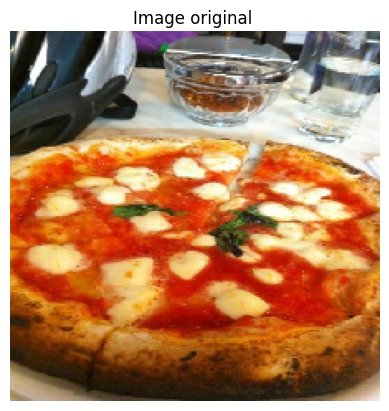

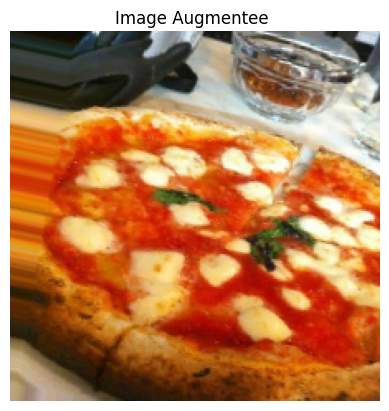

In [ ]:
# Afficher l'image d'origine et l'image augmentée
Nombre_aleat = random.randint(0, 32) # nous fabriquons des lots(batches) de taille 32, nous obtiendrons donc une instance aléatoire
plt.imshow(images[Nombre_aleat])
plt.title(f"Image original ")
plt.axis(False)
plt.figure()
plt.imshow(images_augmenter[Nombre_aleat])
plt.title(f"Image Augmentee ")
plt.axis(False);

Remarque : combien dois-je augmenter ?  
Quant à savoir combien de données augmenter, il n'y a pas de pratique établie pour cela. Il est
préférable de vérifier les options de la classe ImageDataGenerator et de réfléchir à la manière
dont un modèle de votre cas d'utilisation pourrait bénéficier d'une augmentation des données.    
    
Maintenant, que nous avons des données augmentées, essayons de réajuster un modèle dessus et
voyons comment cela affecte l’entraînement.

In [ ]:
# Créer le modèle (identique à model_5)
model_3 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size= 2*2,
              padding="same",
              strides= 2,
              data_format="channels_last"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size= 2*2,
              padding="same",
              strides= 2,
              data_format="channels_last"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size= 2*2,
              padding="same",
              strides= 2,
              data_format="channels_last"),
    Flatten(),
    Dense(1,activation="sigmoid")
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiler le modèle
model_3.compile(loss="binary_crossentropy",
                  optimizer=Adam() ,
                  metrics=["accuracy"])

In [ ]:
# Adapter le modèle (utilizer les données augmenter dans l’entrainement)
historique_3 = model_3.fit(
    donnees_train_augmenter, # Données de formation
    epochs=5,
    batch_size=32,
    #steps_per_epoch=len(donnees_train_augmenter),
    validation_data=donnees_test,  # important
    # validation_steps=len(donnees_test)
)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.4278 - loss: 0.7545 - val_accuracy: 0.6000 - val_loss: 0.6916
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.5573 - loss: 0.6968 - val_accuracy: 0.7320 - val_loss: 0.6712
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6200 - loss: 0.6752 - val_accuracy: 0.7000 - val_loss: 0.6007
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.6781 - loss: 0.6609 - val_accuracy: 0.7500 - val_loss: 0.5616
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.6655 - loss: 0.6534 - val_accuracy: 0.5720 - val_loss: 0.6319


In [ ]:
# Afficher l'architecture du modèle
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 55, 55, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 53, 53, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 27, 27, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 7290)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           7,291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,175 (110.06 KB)

 Trainable params: 9,391 (36.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,784 (73.38 KB)

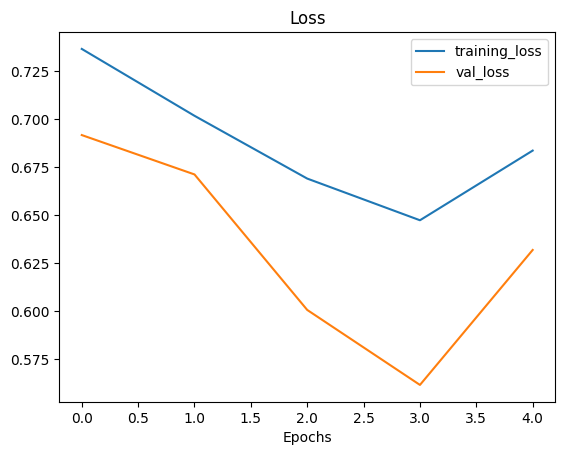

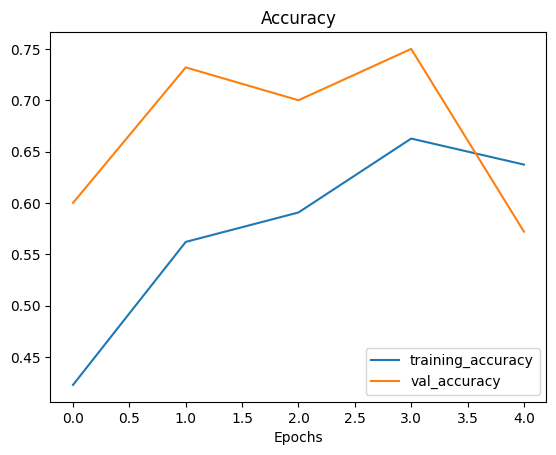

In [ ]:
Tracer_perte_curves(historique_3)

le phenomene de sur-apprentissage persiste

Refaire les mêmes étapes du modèle 3 mais cette fois-ci en mélangeant les données
d'entraînement augmentées. (entraîner le modèle et décrire les résultats)

In [ ]:
train_gen_donnees_augmenter_melange = ImageDataGenerator(
    rescale=1/255.,  # Normalisation des pixels
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

donnees_train_augmenter_melange = train_gen_donnees_augmenter_melange.flow_from_directory(
    Chemin_train,  # Répertoire des données
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True  # Mélanger les données
)

Found 1500 images belonging to 2 classes.


In [ ]:
# Charger les données de test pour validation
test_gen = ImageDataGenerator(rescale=1/255.)
donnees_test = test_gen.flow_from_directory(
    Chemin_test,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
model_3.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Found 500 images belonging to 2 classes.


In [ ]:
historique_3_melange = model_3.fit(
    donnees_train,                   # Données de formation
    epochs=5,
    batch_size=32,# Nombre d'époques # Nombre de batches dans donnees_train
    validation_data=donnees_test,    # Données de validation/test
   # Nombre de batches dans donnees_test
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.6088 - loss: 0.6454 - val_accuracy: 0.7800 - val_loss: 0.5246
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.7416 - loss: 0.5610 - val_accuracy: 0.7340 - val_loss: 0.5560
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.7278 - loss: 0.5406 - val_accuracy: 0.7800 - val_loss: 0.4672
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.7728 - loss: 0.5336 - val_accuracy: 0.6760 - val_loss: 0.6054
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6268 - loss: 0.6111 - val_accuracy: 0.8100 - val_loss: 0.4567


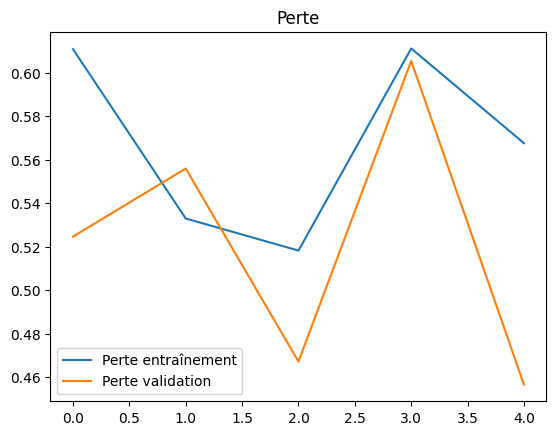

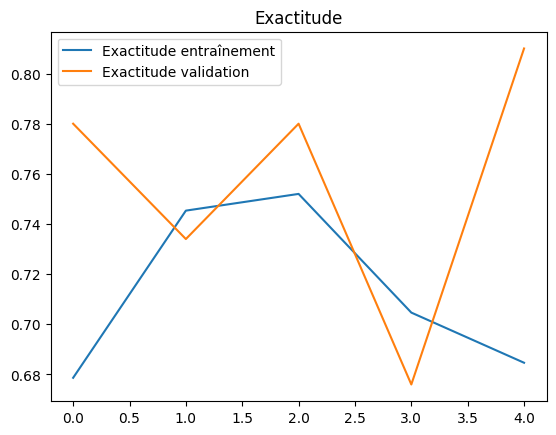

In [ ]:
import matplotlib.pyplot as plt

def tracer_historique(historique):
    # Courbes de perte
    plt.plot(historique.history['loss'], label='Perte entraînement')
    plt.plot(historique.history['val_loss'], label='Perte validation')
    plt.title('Perte')
    plt.legend()
    plt.show()

    # Courbes d'exactitude
    plt.plot(historique.history['accuracy'], label='Exactitude entraînement')
    plt.plot(historique.history['val_accuracy'], label='Exactitude validation')
    plt.title('Exactitude')
    plt.legend()
    plt.show()

tracer_historique(historique_3_melange)

le probleme de sur-apprentissage persiste

### Répéter jusqu'à satisfaction


Nous avons déjà formé quelques modèles sur la base de données et jusqu'à présent, ils fonctionnent plutôt bien.  
Puisque nous avons déjà dépassé notre base de référence, il existe différentes choses que nous
pourrions essayer pour continuer à améliorer le modèle :
- Augmentez le nombre de couches de modèle (par exemple, ajoutez plus de couches
convolutionnelles).
- augmentez le nombre de filtres dans chaque couche convolutive (par exemple de 10 à 32,
64 ou 128, ces chiffres ne sont pas gravés dans le marbre non plus, ils sont généralement
trouvés par essais et erreurs).
-  Entraînez-vous plus longtemps (plus d'époques).
-  Trouver un rythme d'apprentissage idéal.
-  Obtenez plus de données (donnez au modèle plus d'occasions d'apprendre).
Utilisez l'apprentissage par transfert ( **transfer learning**) pour tirer parti de ce qu'un autre modèle d'image a appris et l'adapter à notre propre cas d'utilisation.
L'ajustement de chacun de ces paramètres (à l'exception des deux derniers) pendant le développement du modèle est généralement appelé **réglage des hyper-paramètres**.
Revenons au point de départ et essayons notre modèle d'origine (l'architecture TinyVGG) :  
— conv1 : 10 convolutions 3×3, suivie de ReLU  
— conv2 : 10 convolutions 3×3, suivie de ReLU  
— pool1 : max-pooling 2×2  
— conv3 : 10 convolutions 3×3, suivie de ReLU  
— conv4 : 10 convolutions 3×3, suivie de ReLU  
— pool2 : max-pooling 2×2  
— fc4 : fully-connected  
— fc5 : fully-connected, neurones binaires en sortie, suivie de sigmoide

 refaire les mêmes étapes une fois en utilisant les données normales et l’autre fois en
utilisant les données augmentées et décrire les résultats des deux modèles (modele_4,
modele_5)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,Activation
from tensorflow.keras import Sequential

def creer_tinyvgg():
    return Sequential([
        # conv1
        Conv2D(10, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        # conv2
        Conv2D(10, (3, 3), activation='relu'),
        # pool1
        MaxPool2D(pool_size=(2, 2)),

        # conv3
        Conv2D(10, (3, 3), activation='relu'),
        # conv4
        Conv2D(10, (3, 3), activation='relu'),
        # pool2
        MaxPool2D(pool_size=(2, 2)),

        # fc4
        Flatten(),
        Dense(128, activation='relu'),  # Fully connected layer

        # fc5
        Dense(1, activation='sigmoid')  # Binary output
    ])

In [ ]:
train_gen_normal = ImageDataGenerator(rescale=1/255.)
train_data_normal = train_gen_normal.flow_from_directory(
    Chemin_train,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
donnees_train_augmenter = train_gen_donnees_augmenter.flow_from_directory(
    Chemin_train,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)
test_gen_normal = ImageDataGenerator(rescale=1/255.)
test_data_normal = test_gen_normal.flow_from_directory(
    Chemin_test,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


#### 1- En utilisant les données normales

In [ ]:
modele_4 = creer_tinyvgg()

In [ ]:
modele_4.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
historique_4 = modele_4.fit(
    train_data_normal,
    validation_data=test_data_normal,
    epochs=5
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.5893 - loss: 0.7917 - val_accuracy: 0.8320 - val_loss: 0.3996
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.7939 - loss: 0.4514 - val_accuracy: 0.8580 - val_loss: 0.3507
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.8242 - loss: 0.3956 - val_accuracy: 0.8520 - val_loss: 0.3512
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.8518 - loss: 0.3467 - val_accuracy: 0.8880 - val_loss: 0.3037
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.8811 - loss: 0.2890 - val_accuracy: 0.8480 - val_loss: 0.3671


In [ ]:
def tracer_historique(historique, titre):
    plt.plot(historique.history['accuracy'], label='Exactitude entraînement')
    plt.plot(historique.history['val_accuracy'], label='Exactitude validation')
    plt.title(f'{titre} - Exactitude')
    plt.legend()
    plt.show()

    plt.plot(historique.history['loss'], label='Perte entraînement')
    plt.plot(historique.history['val_loss'], label='Perte validation')
    plt.title(f'{titre} - Perte')
    plt.legend()
    plt.show()

tracer_historique(historique_4, "Modele avec données normales")

NameError: name 'historique_4' is not defined

#### 2- En utilisant les données augmentées

In [ ]:
modele_5=creer_tinyvgg()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modele_5.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])


In [ ]:
historique_5 = modele_5.fit(
    donnees_train_augmenter,
    validation_data=test_data_normal,
    epochs=5
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.5117 - loss: 2.7372 - val_accuracy: 0.7000 - val_loss: 0.6818
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.5336 - loss: 0.6903 - val_accuracy: 0.5680 - val_loss: 0.6653
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.5713 - loss: 0.6782 - val_accuracy: 0.7880 - val_loss: 0.6198
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.7025 - loss: 0.6329 - val_accuracy: 0.5580 - val_loss: 0.6203
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.6226 - loss: 0.6809 - val_accuracy: 0.5820 - val_loss: 0.6421


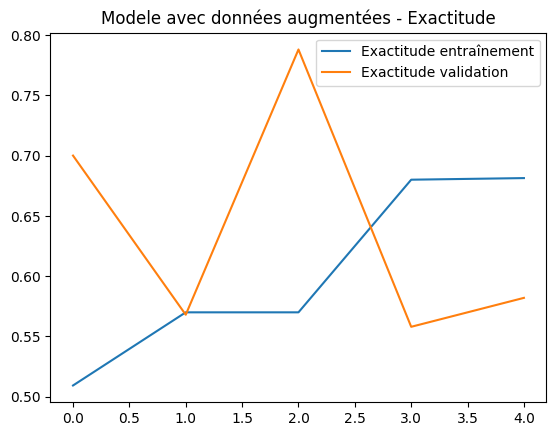

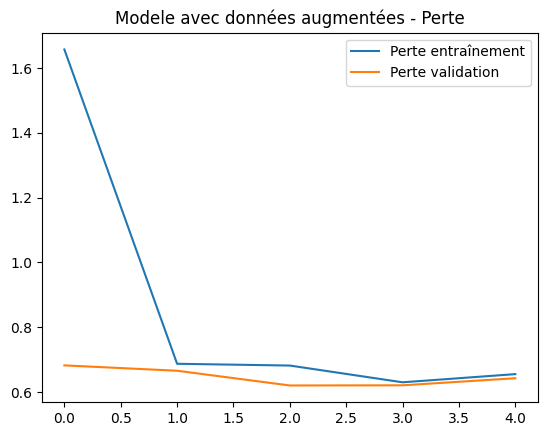

In [ ]:
def tracer_historique(historique, titre):
    plt.plot(historique.history['accuracy'], label='Exactitude entraînement')
    plt.plot(historique.history['val_accuracy'], label='Exactitude validation')
    plt.title(f'{titre} - Exactitude')
    plt.legend()
    plt.show()

    plt.plot(historique.history['loss'], label='Perte entraînement')
    plt.plot(historique.history['val_loss'], label='Perte validation')
    plt.title(f'{titre} - Perte')
    plt.legend()
    plt.show()

tracer_historique(historique_5, "Modele avec données augmentées")

# Faire une prédiction avec notre modèle entraîné


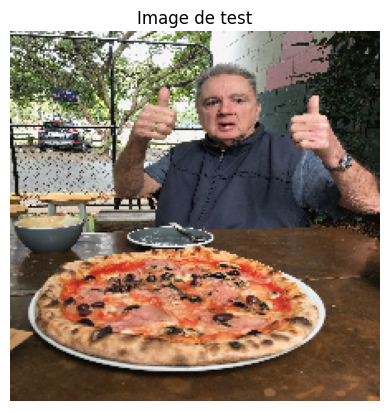

Forme de l'image : (224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Prédiction : [[0.78841555]]


In [ ]:
from tensorflow.keras.preprocessing import image

# Charger une image
chemin_image = "03-pizza-dad.jpeg"
image_test = image.load_img(chemin_image, target_size=(224, 224))
plt.imshow(image_test)
plt.axis(False)
plt.title("Image de test")
plt.show()

# Vérifiez la forme
image_test_array = image.img_to_array(image_test)
print(f"Forme de l'image : {image_test_array.shape}")
# Ajouter une dimension batch
image_test_array = np.expand_dims(image_test_array, axis=0) / 255.

# Faire une prédiction
prediction = modele_5.predict(image_test_array)
print(f"Prédiction : {prediction}")

Implémenter la fonction qui permet d’ pouvons importer et décoder l’image en utilisant   
tf.io.read_file (pour lire les fichiers) et tf.image (pour redimensionner l’image et la
transformer en tenseur).

In [ ]:
import tensorflow as tf
def Impo_and_redim_image(nomfich, img_shape=224):
    """
    Lire une image à partir du nom de fichier, la transforme en tenseur
    et le remodèle en (img_shape, img_shape, color_channel).

    :param nomfich: Le nom du fichier image.
    :param img_shape: La taille souhaitée pour l'image redimensionnée.
    :return: L'image sous forme de tenseur redimensionné (img_shape, img_shape, 3).
    """
    # Lire l'image à partir du fichier
    image = tf.io.read_file(nomfich)

    # Décoder l'image pour obtenir un tenseur
    image = tf.image.decode_image(image, channels=3)  # Assurer 3 canaux de couleur

    # Redimensionner l'image à la forme souhaitée
    image = tf.image.resize(image, size=[img_shape, img_shape])

    # Normaliser l'image (valeurs entre 0 et 1)
    image = image / 255.0

    return image

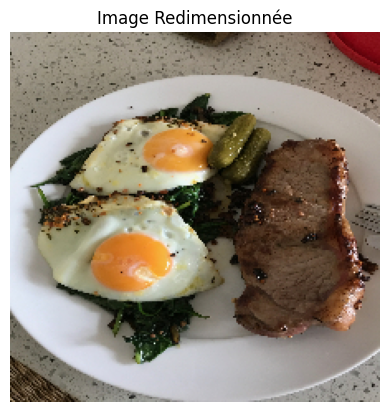

Forme de l'image : (224, 224, 3)


In [ ]:
# Exemple d'utilisation
nomfich = '03-steak.jpeg'
image_redim = Impo_and_redim_image(nomfich)

# Visualiser l'image redimensionnée
plt.imshow(image_redim)
plt.axis('off')
plt.title("Image Redimensionnée")
plt.show()

# Vérifier la forme de l'image
print(f"Forme de l'image : {image_redim.shape}")

Charger l’image et faite la prédiction, mais avant ça, il faut ajouter un supplément à notre tenseur
d'image personnalisé à l'aide de tf.expand_dims afin d’ajouter la taille du lot (batch) dans la
première dimension (batch_size, 224, 224, 3) comme la forme qui existe dans le modèle

In [ ]:
# Charger et prétraiter notre image personnalisée
steak = Impo_and_redim_image("03-steak.jpeg")
#pizza = Impo_and_redim_image("03-pizza-dad.jpeg")

 # Ajouter un axe supplémentaire
print(f" Forme avant la nouvelle dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # ajouter une dimension supplémentaire à l'axe 0
print(f" Forme après la nouvelle dimension: {steak.shape}")

 Forme avant la nouvelle dimension: (224, 224, 3)
 Forme après la nouvelle dimension: (1, 224, 224, 3)


In [ ]:
# Faire une prédiction sur le tenseur d'image personnalisé
pred1 = modele_5.predict(steak)
pred1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[0.8117379]], dtype=float32)

In [ ]:
Classe_pred = Noms_de_classes[int(tf.round(pred1)[0][0])]
Classe_pred

'steak'

In [ ]:
# Charger et prétraiter notre image personnalisée
pizza = Impo_and_redim_image("03-pizza-dad.jpeg")

 # Ajouter un axe supplémentaire
print(f" Forme avant la nouvelle dimension: {pizza.shape}")
pizza = tf.expand_dims(pizza, axis=0) # ajouter une dimension supplémentaire à l'axe 0
print(f" Forme après la nouvelle dimension: {pizza.shape}")

 Forme avant la nouvelle dimension: (224, 224, 3)
 Forme après la nouvelle dimension: (1, 224, 224, 3)


In [ ]:
pred2 = modele_5.predict(pizza)
pred2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[0.786295]], dtype=float32)

In [ ]:
Classe_pred = Noms_de_classes[int(tf.round(pred2)[0][0])]
Classe_pred

'steak'

En général, les prédictions sortent sous forme de probabilité de prédiction. En d'autres termes, cela signifie la probabilité que l'image soit d'une classe ou d'une autre.  
Puisque nous travaillons avec un problème de classification binaire, si la probabilité de prédiction est supérieure à 0,5, selon le modèle, la prédiction est plus susceptible d'être la classe positive (classe
1).  
Et si la probabilité de prédiction est inférieure à 0,5, selon le modèle, la classe prédite est très
probablement la classe négative (classe 0).

 ### implémenter une petite fonction pour convertir les prédictions en leurs noms de classe, puis traçons l'image cible.

In [ ]:
# Fonction pour importer l'image, faire une prédiction et afficher la classe prédite
def pred_et_Tracer(modele, nom_fich, Nom_des_classes):
    """
    Importe une image située au nom du fichier, fait une prédiction
    de cette image avec un modèle formé et trace l'image avec la
    classe prédite comme titre.
    """
    # Importer et prétraiter l'image
    img = Impo_and_redim_image(nom_fich)

    # Ajouter une dimension supplémentaire (batch size)
    img = tf.expand_dims(img, axis=0)

    # Faire une prédiction
    pred = modele.predict(img)

    # Obtenir la classe prédite en arrondissant la probabilité
    classe_pred = Noms_de_classes[int(tf.round(pred)[0][0])]

    # Tracer l'image et afficher la classe prédite
    plt.imshow(img[0])  # Accéder à l'image de batch
    plt.title(f"Prediction: {classe_pred}")
    plt.axis(False)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


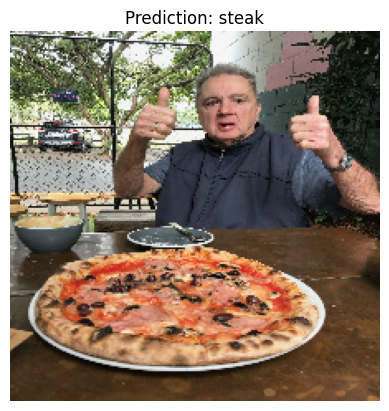

In [ ]:
# Exemple d'appel de la fonction avec un modèle et une image
pred_et_Tracer(modele_5, "03-steak.jpeg", Noms_de_classes)

In [ ]:
modele_5.save("saved_trained_model.keras")